In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import random

large_cap=os.listdir("Large_Cap/")
large_file= random.sample(large_cap, 10)

mid_cap=os.listdir("Mid_Cap/")
mid_file= random.sample(mid_cap, 10)

small_cap=os.listdir("Small_Cap/")
small_file= random.sample(small_cap, 10)


In [3]:
portfolio=pd.DataFrame()

for i in large_file:
    df=pd.read_csv('Large_Cap/{}'.format(i))
    portfolio['{}'.format(df['Symbol'].iloc[1])]=df['Close Price']
    
for i in mid_file:
    df=pd.read_csv('Mid_Cap/{}'.format(i))
    portfolio['{}'.format(df['Symbol'].iloc[1])]=df['Close Price']
    
for i in small_file:
    df=pd.read_csv('Small_Cap/{}'.format(i))
    portfolio['{}'.format(df['Symbol'].iloc[1])]=df['Close Price']
    

In [4]:
print('portfolio.shape:          ', portfolio.shape)
print('portfolio.shape.dropna(): ', portfolio.dropna().shape)

portfolio.shape:           (496, 30)
portfolio.shape.dropna():  (270, 30)


In [5]:
portfolio=portfolio.dropna()

def normalize_weights( weights ):
    for i in range(0,3):
        weights  = np.round( weights, 3 ) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(portfolio.shape[1])
    return normalize_weights( weights )

weights = random_weights()
weights

array([0.04690619, 0.0508982 , 0.01696607, 0.02095808, 0.02894212,
       0.05788423, 0.04291417, 0.00199601, 0.00199601, 0.01896208,
       0.05389222, 0.04790419, 0.01796407, 0.05489022, 0.02794411,
       0.01397206, 0.04690619, 0.03992016, 0.0499002 , 0.01796407,
       0.05289421, 0.02095808, 0.04690619, 0.04091816, 0.05988024,
       0.0249501 , 0.03493014, 0.00998004, 0.03393214, 0.01497006])

In [6]:
working_days_per_year    = 252
portfolio_summary = pd.DataFrame()
portfolio_summary['returns']    = portfolio.pct_change().mean() * working_days_per_year
portfolio_summary['volatility'] = portfolio.pct_change().std()  * np.sqrt( working_days_per_year )
portfolio_summary

,returns,volatility
DRREDDY,-0.141956,0.302842
IOC,-0.638946,0.570884
HINDUNILVR,0.494728,0.178978
HINDALCO,0.232057,0.321480
ASIANPAINT,0.125403,0.189874
LT,-0.142329,0.378283
MARUTI,0.276915,0.178178
INFY,0.288003,0.227245
BAJFINANCE,0.538877,0.295361
GAIL,-0.104570,0.362653


Text(0, 0.5, 'inertia - % change')

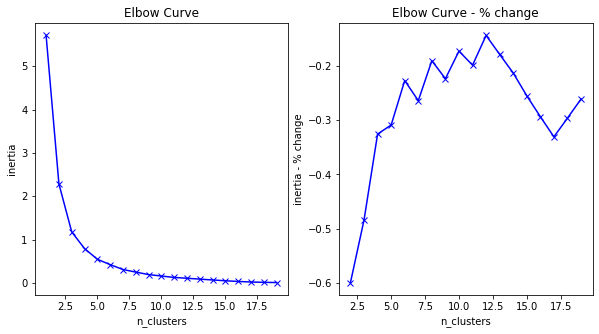

In [7]:
elbow_curve = [None]+[KMeans(n_clusters=n, random_state=0).fit(portfolio_summary).inertia_ for n in range(1,20) ]

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].plot( elbow_curve ,'bx-')
axes[0].set_title('Elbow Curve')    
axes[0].set_xlabel('n_clusters')
axes[0].set_ylabel('inertia')

axes[1].plot( pd.Series(elbow_curve).pct_change(),'bx-' )
axes[1].set_title('Elbow Curve - % change')    
axes[1].set_xlabel('n_clusters')
axes[1].set_ylabel('inertia - % change')

### Elbow method shows that n=5 clusters is the optimum number of clusters

In [11]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(portfolio_summary)

In [12]:
portfolio_summary['cluster']=kmeans.labels_

In [13]:
portfolio_summary

,returns,volatility,cluster
DRREDDY,-0.141956,0.302842,1
IOC,-0.638946,0.570884,3
HINDUNILVR,0.494728,0.178978,0
HINDALCO,0.232057,0.321480,0
ASIANPAINT,0.125403,0.189874,0
LT,-0.142329,0.378283,1
MARUTI,0.276915,0.178178,0
INFY,0.288003,0.227245,0
BAJFINANCE,0.538877,0.295361,2
GAIL,-0.104570,0.362653,1


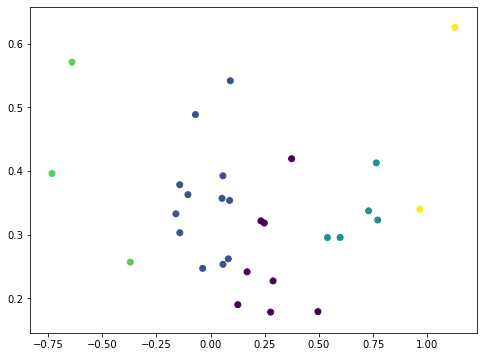

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(portfolio_summary['returns'],portfolio_summary['volatility'], c=portfolio_summary['cluster'].astype(float))
